In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':18})

In [6]:
g1 = np.loadtxt('force_g1.00.dat') 
g05 = np.loadtxt('force_g0.50.dat') 
g75 = np.loadtxt('force_g0.75.dat') 

g1 = np.loadtxt('force_cube_g1.00.dat') 
g05 = np.loadtxt('force_cube_g0.50.dat') 
g75 = np.loadtxt('force_cube_g0.75.dat') 

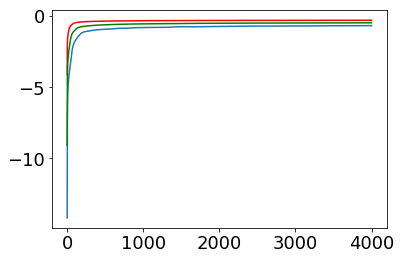

In [7]:
plt.plot(g1[:,0], -g1[:,1])
plt.plot(g05[:,0], -g05[:,1], 'r')
plt.plot(g75[:,0], -g75[:,1], 'g')

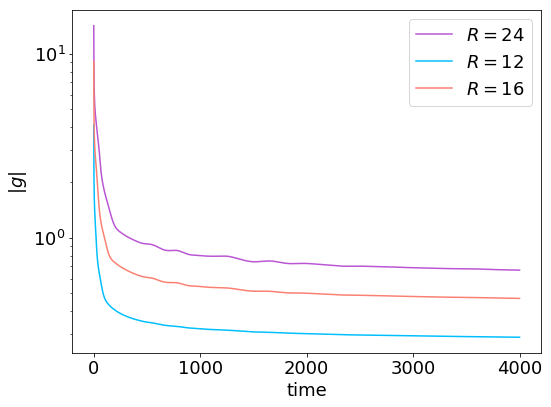

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(g1[:,0], np.linalg.norm(g1[:,1:], axis=1),'mediumorchid', label='$R = 24$')
ax.plot(g05[:,0], np.linalg.norm(g05[:,1:], axis=1), 'deepskyblue', label='$R = 12$')
ax.plot(g75[:,0], np.linalg.norm(g75[:,1:], axis=1), 'salmon', label='$R = 16$')

ax.set_xlabel('time')
ax.set_ylabel('$|g|$')

ax.legend()
ax.set_yscale('log')


fig.tight_layout()
fig.savefig('abs_g_time.pdf', dpi=300)

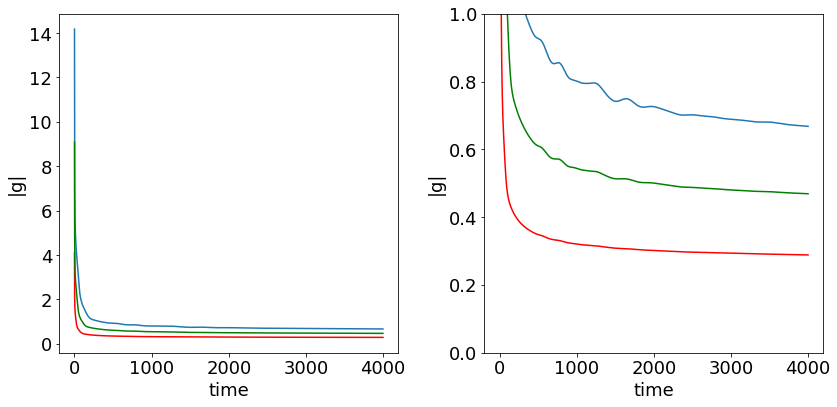

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(g1[:,0], np.linalg.norm(g1[:,1:], axis=1), label='r = 1')
ax[0].plot(g05[:,0], np.linalg.norm(g05[:,1:], axis=1), 'r', label='r = 0.5')
ax[0].plot(g75[:,0], np.linalg.norm(g75[:,1:], axis=1), 'g', label='r = 0.75')

ax[1].plot(g1[:,0], np.linalg.norm(g1[:,1:], axis=1), label='r = 1')
ax[1].plot(g05[:,0], np.linalg.norm(g05[:,1:], axis=1), 'r', label='r = 0.5')
ax[1].plot(g75[:,0], np.linalg.norm(g75[:,1:], axis=1), 'g', label='r = 0.75')
ax[1].set_ylim([0, 1])

ax[0].set_xlabel('time')
ax[0].set_ylabel('|g|')
ax[1].set_xlabel('time')
ax[1].set_ylabel('|g|')

fig.tight_layout()
#fig.savefig('time_g.png', dpi=300)

In [12]:
x

array([0.5 , 0.75, 1.  ])

0.5904


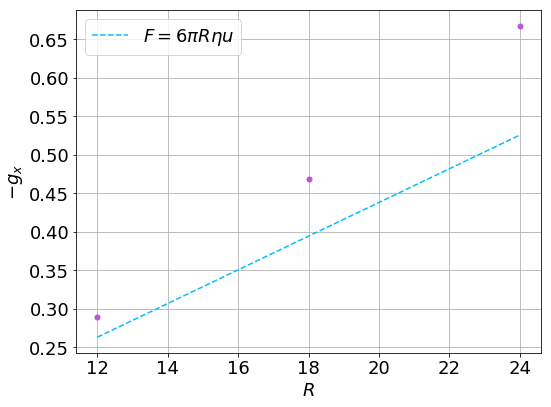

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(1*24, -g1[-1,1], '.', color='mediumorchid', ms=10)
ax.plot(0.5*24, -g05[-1,1], '.', color='mediumorchid', ms=10)
ax.plot(0.75*24, -g75[-1,1], '.', color='mediumorchid', ms=10)


inlet_velocity = 0.001968
tau = 2.2712
viscosity = 24 * inlet_velocity / 0.08
print(viscosity)
#viscosity = 1.25
ax.plot(x, 6 * np.pi * x * inlet_velocity * viscosity, '--', color='deepskyblue',
        label=r'$F = 6\pi R \eta u$')

#ax.plot(x, a * x + b, '--k', alpha=0.5, label='МНК: %.2f + %.2f*r'%(b, a))

ax.legend()
ax.grid()

ax.set_xlabel('$R$')
ax.set_ylabel('$-g_x$')

fig.tight_layout()
#fig.savefig('r_g.png', dpi=300)

In [9]:
x = np.array([0.5, 0.75, 1])
y = np.array([-g05[-1,1], -g75[-1,1], -g1[-1,1]])
#y = np.array([g05[-1,1], g75[-1,1], g1[-1,1]])

a, b = np.polyfit(x, y, deg=1)
a, b

(0.7583664138160001, -0.09360378430499981)

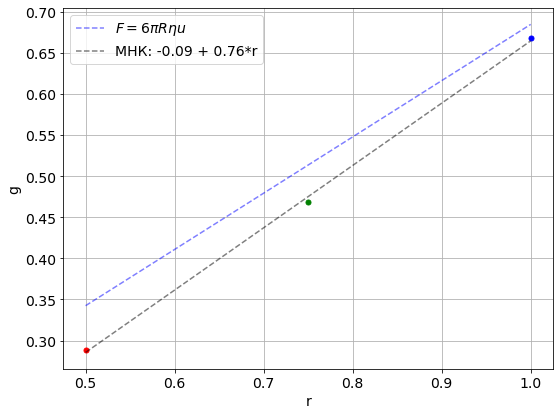

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(1, -g1[-1,1], '.b', ms=10)
ax.plot(0.5, -g05[-1,1], '.r', ms=10)
ax.plot(0.75, -g75[-1,1], '.g', ms=10)

ax.plot(x, 6 * np.pi * x * 0.7569 * 0.002 * 24 , '--b', alpha=0.5,
        label=r'$F = 6\pi R \eta u$')

ax.plot(x, a * x + b, '--k', alpha=0.5, label='МНК: %.2f + %.2f*r'%(b, a))

ax.legend()
ax.grid()

ax.set_xlabel('r')
ax.set_ylabel('g')

fig.tight_layout()
#fig.savefig('r_g.png', dpi=300)

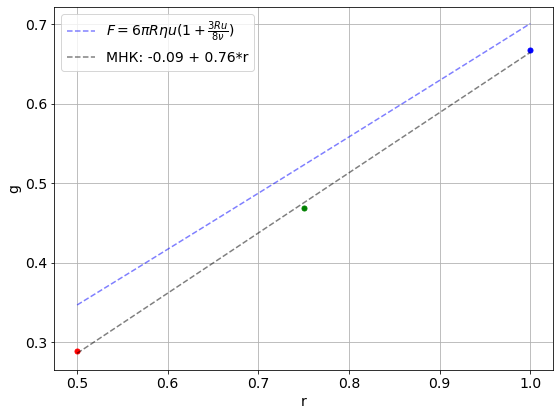

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(1, -g1[-1,1], '.b', ms=10)
ax.plot(0.5, -g05[-1,1], '.r', ms=10)
ax.plot(0.75, -g75[-1,1], '.g', ms=10)


xx = np.linspace(0.5*24, 24, 101)
ax.plot(xx/24, 6 * np.pi * xx * 0.7569 * 0.002 * 
        (1 + 3 * xx  * 0.002 / 8 / 0.7569) , '--b', alpha=0.5,
        label=r'$F = 6\pi R \eta u (1+\frac{3 R u}{8 \nu})$')

ax.plot(x, a * x + b, '--k', alpha=0.5, label='МНК: %.2f + %.2f*r'%(b, a))

ax.legend()
ax.grid()

ax.set_xlabel('r')
ax.set_ylabel('g')

fig.tight_layout()
#fig.savefig('r_g.png', dpi=300)

In [16]:
u = 0.002
nu = 0.7569
eta = nu
R = x * 24 # in lattice units

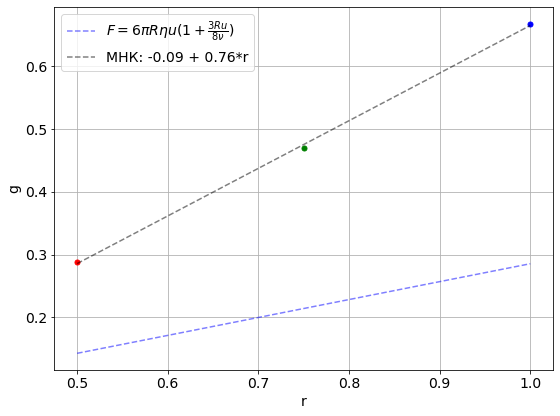

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(1, -g1[-1,1], '.b', ms=10)
ax.plot(0.5, -g05[-1,1], '.r', ms=10)
ax.plot(0.75, -g75[-1,1], '.g', ms=10)

ax.plot(x, 2 * np.pi * u * eta * R * 5/ 4 , '--b', alpha=0.5,
        label=r'$F = 6\pi R \eta u (1+\frac{3 R u}{8 \nu})$')

ax.plot(x, a * x + b, '--k', alpha=0.5, label='МНК: %.2f + %.2f*r'%(b, a))

ax.legend()
ax.grid()

ax.set_xlabel('r')
ax.set_ylabel('g')

fig.tight_layout()
#fig.savefig('r_g.png', dpi=300)

In [77]:
(-g1[-1,1]-g05[-1,1])/2

0.5325158869065

In [103]:
gn1 = np.loadtxt('force_narrow_g1.00.dat') 
gn05 = np.loadtxt('force_narrow_g0.50.dat') 
gn75 = np.loadtxt('force_narrow_g0.75.dat') 

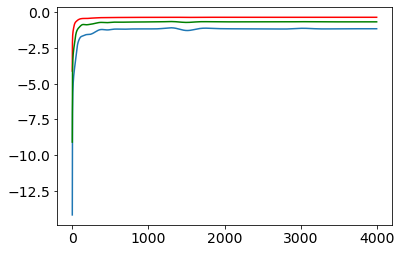

In [104]:
plt.plot(gn1[:,0], gn1[:,1])
plt.plot(gn05[:,0], gn05[:,1], 'r')
plt.plot(gn75[:,0], gn75[:,1], 'g')

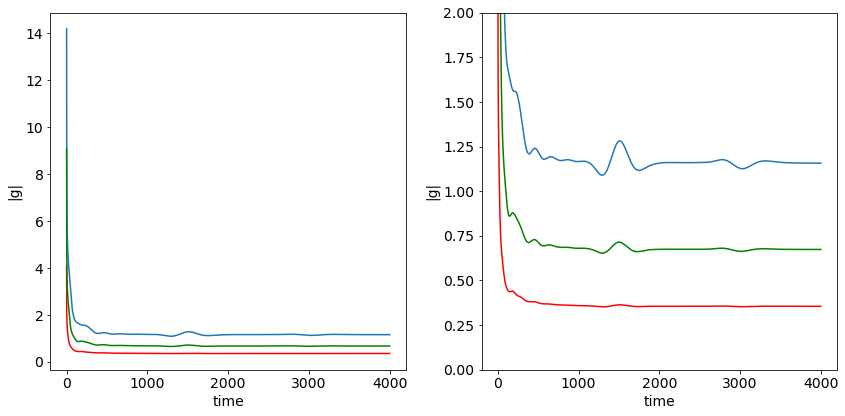

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(gn1[:,0], np.linalg.norm(gn1[:,1:], axis=1), label='r = 1')
ax[0].plot(gn05[:,0], np.linalg.norm(gn05[:,1:], axis=1), 'r', label='r = 0.5')
ax[0].plot(gn75[:,0], np.linalg.norm(gn75[:,1:], axis=1), 'g', label='r = 0.75')

ax[1].plot(gn1[:,0], np.linalg.norm(gn1[:,1:], axis=1), label='r = 1')
ax[1].plot(gn05[:,0], np.linalg.norm(gn05[:,1:], axis=1), 'r', label='r = 0.5')
ax[1].plot(gn75[:,0], np.linalg.norm(gn75[:,1:], axis=1), 'g', label='r = 0.75')
ax[1].set_ylim([0, 2])

ax[0].set_xlabel('time')
ax[0].set_ylabel('|g|')
ax[1].set_xlabel('time')
ax[1].set_ylabel('|g|')

fig.tight_layout()
#fig.savefig('time_g.png', dpi=300)

In [106]:
x = np.array([0.5, 0.75, 1])
y = np.array([-gn05[-1,1], -gn75[-1,1], -gn1[-1,1]])

a1, b1 = np.polyfit(x, y, deg=1)
a1, b1

(1.6029609618700016, -0.4736288607535015)

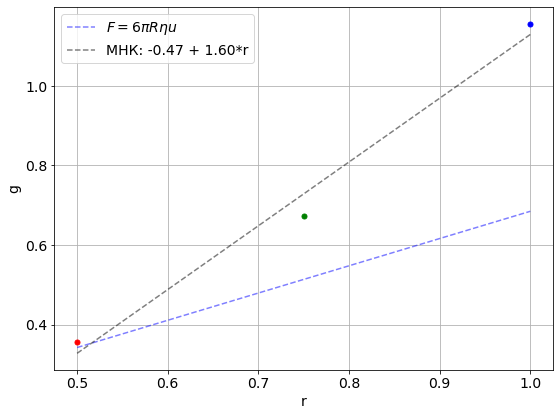

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(1, -gn1[-1,1], '.b', ms=10)
ax.plot(0.5, -gn05[-1,1], '.r', ms=10)
ax.plot(0.75, -gn75[-1,1], '.g', ms=10)

ax.plot(x, 6 * np.pi * x * 0.7569 * 0.002 * 24 , '--b', alpha=0.5,
        label=r'$F = 6\pi R \eta u$')

ax.plot(x, a1 * x + b1, '--k', alpha=0.5,
        label='МНК: %.2f + %.2f*r'%(b1, a1))

ax.legend()
ax.grid()

ax.set_xlabel('r')
ax.set_ylabel('g')

fig.tight_layout()
#fig.savefig('r_g.png', dpi=300)

In [46]:
pat  = ['force_narrow_g%s.dat', 'force_g%s.dat', 'force_cube_g%s.dat']
r = ['1.00', '0.50', '0.75']

col = ['deepskyblue', 'salmon', 'mediumorchid']

obl = ['I', 'II', 'III']

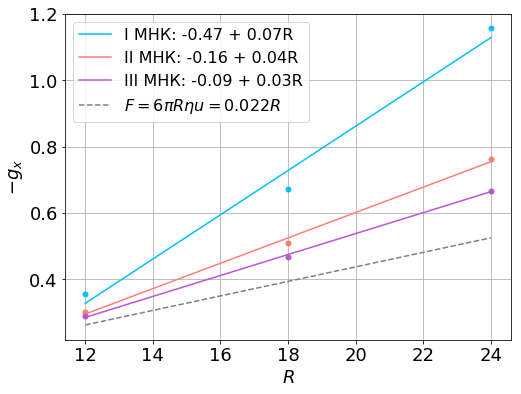

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, p in enumerate(pat):
    g1 = np.loadtxt(p%r[0])
    g05 = np.loadtxt(p%r[1])
    g75 = np.loadtxt(p%r[2])
    
    ax.plot(1*24, -g1[-1,1], '.', color=col[i], ms=10)
    ax.plot(0.5*24, -g05[-1,1], '.', color=col[i],ms=10)
    ax.plot(0.75*24, -g75[-1,1], '.', color=col[i],ms=10)

    
    x = np.array([0.5, 0.75, 1])*24
    y = np.array([-g05[-1,1], -g75[-1,1], -g1[-1,1]])
    a1, b1 = np.polyfit(x, y, deg=1)
    
    ax.plot(x, a1 * x + b1, '-', color=col[i], 
            label='%s МНК: %.2f + %.2fR'%(obl[i], b1, a1))

#ax.plot(x, 6 * np.pi * x * 0.7569 * 0.002 * 24 , '--k', alpha=0.5,
#            label=r'$F = 6\pi R \eta u$')
viscosity = 24 * inlet_velocity / 0.08
#viscosity = 1.25
ax.plot(x, 6 * np.pi * x *  inlet_velocity * viscosity, '--',color='gray',
            label=r'$F = 6\pi R \eta u = %.3fR$'%(6 * np.pi * inlet_velocity * viscosity))

ax.grid()

ax.set_xlabel('$R$')
ax.set_ylabel('$-g_x$')

ax.legend(fontsize=16)

fig.savefig('size_diff_stokes.pdf', dpi=300)

In [58]:
viscosity

0.5904

In [61]:
inlet_velocity

0.001968

In [62]:
viscosity

0.5904

In [57]:
6 * np.pi * inlet_velocity * viscosity

0.021901434742038522

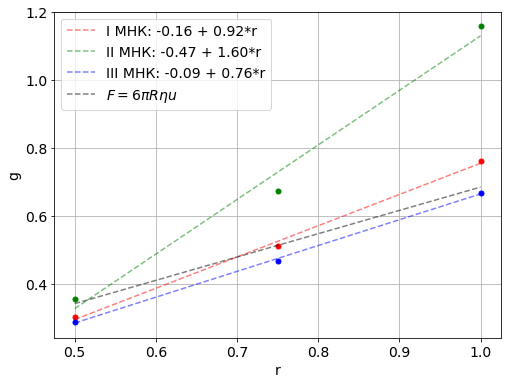

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, p in enumerate(pat):
    g1 = np.loadtxt(p%r[0])
    g05 = np.loadtxt(p%r[1])
    g75 = np.loadtxt(p%r[2])
    
    ax.plot(1, -g1[-1,1], '.', color=col[i], ms=10)
    ax.plot(0.5, -g05[-1,1], '.', color=col[i],ms=10)
    ax.plot(0.75, -g75[-1,1], '.', color=col[i],ms=10)

    
    x = np.array([0.5, 0.75, 1])
    y = np.array([-g05[-1,1], -g75[-1,1], -g1[-1,1]])
    a1, b1 = np.polyfit(x, y, deg=1)
    
    ax.plot(x, a1 * x + b1, '--', color=col[i], alpha=0.5,
            label='%s МНК: %.2f + %.2f*r'%(obl[i], b1, a1))

ax.plot(x, 6 * np.pi * x * 0.7569 * 0.002 * 24 , '--k', alpha=0.5,
            label=r'$F = 6\pi R \eta u$')


ax.grid()

ax.set_xlabel('r')
ax.set_ylabel('g')

ax.legend()

#fig.savefig('size_diff_stokes.png', dpi=300)

In [ ]:
g1 = np.loadtxt('force_g1.00.dat') 
g05 = np.loadtxt('force_g0.50.dat') 
g75 = np.loadtxt('force_g0.75.dat') 

g1 = np.loadtxt('force_cube_g1.00.dat') 
g05 = np.loadtxt('force_cube_g0.50.dat') 
g75 = np.loadtxt('force_cube_g0.75.dat') 